In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.linalg as la
import scipy.optimize as opt

In [3]:
%load_ext rpy2.ipython

**1**. (10 points)

Euclid's algorithm for finding the greatest common divisor of two numbers is

```python
gcd(a, 0) = a
gcd(a, b) = gcd(b, a modulo b)
```

1. Write a function to find the greatest common divisor in Python 
2. What is the greatest common divisor of 17384 and 1928?
3. Write a function to calculate the least common multiple
4. What is the least common multiple of 17384 and 1928? 

In [4]:
def gcd(a, b):
    """Greatest common divsior."""

    if b == 0:
        return a
    else:
        return gcd(b, a % b)

In [5]:
gcd(17384, 1928)

8

In [6]:
def lcm(a, b):
    """Least common multiple."""
    
    d = gcd(a, b)
    return a * (b // d)

In [7]:
lcm(17384, 1928)

4189544

**2**. (10 points)


Using the `iris` dataset from http://goo.gl/3b3439, answer the following questions:

- Find the mean, min and max values of all four measurements (sepal.length, sepal.width, petal.length, petal.width) for each species
- Find the average petal.width for rows where the petal.length is less than the sepal.width

In [8]:
url = 'http://goo.gl/3b3439'
iris = pd.read_csv(url)

In [9]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [10]:
(iris.
 groupby('species')['sepal_length', 'sepal_width', 'petal_length', 'petal_width'].
 agg(['mean', 'min', 'max']))

sepal_length           sepal_width           petal_length       \
                   mean  min  max        mean  min  max         mean  min   
species                                                                     
setosa            5.006  4.3  5.8       3.418  2.3  4.4        1.464  1.0   
versicolor        5.936  4.9  7.0       2.770  2.0  3.4        4.260  3.0   
virginica         6.588  4.9  7.9       2.974  2.2  3.8        5.552  4.5   

                petal_width            
            max        mean  min  max  
species                                
setosa      1.9       0.244  0.1  0.6  
versicolor  5.1       1.326  1.0  1.8  
virginica   6.9       2.026  1.4  2.5

In [11]:
iris.loc[iris.petal_length < iris.sepal_width, 'petal_width'].mean()

0.244

**3**. (10 points)

Find the coordinates of the vector $\pmatrix{1\\ 2 \\3}$ with respect to the eigenvectors of the following matrix.
```
array([[ 0.18673654,  0.20037016,  0.47406091],
       [ 0.21715108,  0.44708353,  0.79204575],
       [ 0.24299882,  0.51936745,  0.3061621 ]])
```

In [12]:
A = np.array([[ 0.18673654,  0.20037016,  0.47406091],
       [ 0.21715108,  0.44708353,  0.79204575],
       [ 0.24299882,  0.51936745,  0.3061621 ]])

In [13]:
e, v = la.eig(A)

In [14]:
x = np.array([1,2,3]).reshape(-1,1)

In [15]:
la.solve(v, x)

array([[-3.82231978],
       [ 0.03563019],
       [ 1.30843022]])

**4**.(20 points)

Consider the following system of equations:

$$\begin{align*}
2x_1& - x_2&    +x_x    &=& 6\\
-x_1& +2x_2& -  x_3 &=& 2\\
 x_1   &  -x_2& + x_3 &=& 1
\end{align*}$$

1. Consider the system in matrix form $Ax=b$ and define $A$, $b$ in numpy.
2. Show that $A$ is positive-definite
3. Use the appropriate matrix decomposition function in numpy and back-substitution to solve the system. Remember to use the structure of the problem to determine the appropriate decomposition.



In [16]:
A = np.array([
    [2, -1, 1],
    [-1, 2, -1],
    [1, -1, 1]
])

In [17]:
b = np.array([6,2,1]).reshape(-1,1)

In [18]:
la.eigvalsh(A)

array([0.26794919, 1.        , 3.73205081])

Since all eigenvalues are positive, $A$ is positive definite.

In [19]:
C = la.cholesky(A, lower=True)
y = la.solve_triangular(C, b, lower=True)
x = la.solve_triangular(C.T, y, lower=False)

In [20]:
x

array([[ 5.],
       [ 3.],
       [-1.]])

In [21]:
A @ x

array([[6.],
       [2.],
       [1.]])

**Alternative**

In [22]:
la.cho_solve(la.cho_factor(A), b)

array([[ 5.],
       [ 3.],
       [-1.]])

**5**. (10 points)

The `heart` dataframe at https://goo.gl/CbJwQM contains  information about the survival of patients on the waiting list for the Stanford heart transplant program.

```
       start, stop, event:  Entry and exit time and status for this interval of time 
       age:                 age-48 years                                             
       year:                year of acceptance (in years after 1 Nov 1967)           
       surgery:             prior bypass surgery 1=yes                               
       transplant:          received transplant 1=yes                                
       id:                  patient id  
```

Answer the following questions with respect to the `heart` data set:

- Sort the data frame by age in descending order (oldest at top) without making a copy
- How many patients received a transplant?
- What is the average age for transplanted patients under the age of 70?
- Find the mean and standard deviation of age for each value of the `transplant` variable.

In [23]:
url = 'https://goo.gl/CbJwQM'
heart = pd.read_csv(url, index_col=0)
heart.head(3)

,start,stop,event,age,year,surgery,transplant,id
1,0.0,50.0,1,-17.155373,0.123203,0,0,1
2,0.0,6.0,1,3.835729,0.254620,0,0,2
3,0.0,1.0,0,6.297057,0.265572,0,0,3


In [24]:
heart.sort_values('age', ascending=False, inplace=True)

In [25]:
heart.head(3)

,start,stop,event,age,year,surgery,transplant,id
50,17.0,77.0,1,16.407940,1.911020,0,1,32
49,0.0,17.0,0,16.407940,1.911020,0,0,32
59,19.0,66.0,1,13.500342,2.565366,0,1,37


In [26]:
sum(heart.transplant == 1)

69

In [27]:
heart.head()

,start,stop,event,age,year,surgery,transplant,id
50,17.0,77.0,1,16.407940,1.911020,0,1,32
49,0.0,17.0,0,16.407940,1.911020,0,0,32
59,19.0,66.0,1,13.500342,2.565366,0,1,37
58,0.0,19.0,0,13.500342,2.565366,0,0,37
28,0.0,37.0,1,11.123888,1.133470,0,0,19


In [28]:
heart['adj_age'] = heart['age'] + 48

In [29]:
heart.loc[(heart.adj_age < 70) & (heart.transplant==1), 'adj_age'].mean()

46.03327083891319

In [30]:
heart.groupby('transplant')['adj_age'].agg(['mean', 'std'])

,mean,std
transplant,,
0,45.169434,9.795042
1,46.033271,8.875709


**6**. (10 points)

You are given the following DNA sequecne in FASTA format.

```python
dna = '''> A simulated DNA sequence.
TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAAC
GACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGA
GCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGG
ACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA
'''
```

* Remove the comment line and combine the 4 lines of nucleotide symbols into a single string
* Count the frequency of all 16 two-letter combinations in the string. 

In [31]:
dna = '''> A simulated DNA sequence.
TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAAC
GACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGA
GCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGG
ACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA
'''

In [32]:
s = ''.join(dna.splitlines()[1:])
s

'TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAACGACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGAGCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGGACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA'

In [33]:
from collections import Counter

In [34]:
c = Counter(zip(s, s[1:]))

In [35]:
c

Counter({('A', 'A'): 26,
         ('A', 'C'): 25,
         ('A', 'G'): 22,
         ('A', 'T'): 11,
         ('C', 'A'): 21,
         ('C', 'C'): 20,
         ('C', 'G'): 33,
         ('C', 'T'): 12,
         ('G', 'A'): 19,
         ('G', 'C'): 24,
         ('G', 'G'): 22,
         ('G', 'T'): 23,
         ('T', 'A'): 19,
         ('T', 'C'): 17,
         ('T', 'G'): 11,
         ('T', 'T'): 14})

**7**. (10 points)

Write a `flatmap` function that works like `map` except that the function given takes a list and returns a list  of lists that is then flattened (4 points).

In other words, `flatmap` takes two arguments, a function and a list (or other iterable), just like `map`. However the function given as the first argument takes a single argument and returns a list (or other iterable). In order to get a simple list back, we need to unravel the resulting list of lists, hence the flatten part.

For example,

```python
flatmap(lambda x: x.split(), ["hello world", "the quick dog"])
```

should return

```python
["hello", "world", "the", "quick", "dog"]
```

In [36]:
def flatmap(f, xss):
    """Flat map."""
    return [x for xs in map(f, xss) for x in xs]

In [37]:
flatmap(lambda x: x.split(), ["hello world", "the quick dog"])

['hello', 'world', 'the', 'quick', 'dog']

**8**. (30 points)

You are given the following set of data to fit a quadratic polynomial to

```python
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])
```

- Find the least squares solution by using the normal equations $A^T A \hat{x} = A^T y$. (5 points)

- Write your own **gradient descent** optimization function to find the least squares solution for the coefficients $\beta$ of a quadratic polynomial. Do **not** use a gradient descent algorithm from a package such as `scipy-optimize` or `scikit-learn`.  You can use a simple for loop - start with the parameters `beta = np.zeros(3)` with a learning rate $\alpha = 0.0001$ and run for 100000 iterations. (15 points)

- Plot the data together with the fitted polynomial. (10 points)



In [38]:
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])

In [39]:
A = np.c_[np.ones(len(x)), x, x**2]

In [40]:
betas = la.solve(A.T @ A, A.T @ y)
betas

array([ 2.55079998,  7.31478229, -2.04118936])

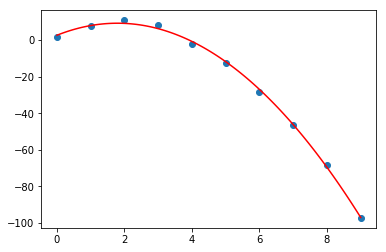

In [41]:
plt.scatter(x, y)
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(xp, betas[0] + betas[1]*xp + betas[2]*xp**2, c='red')
pass

In [42]:
def f(x, y, betas):
    """Cost function"""
    
    return betas[0] + betas[1]*x + betas[2]*x**2 - y

In [43]:
def grad(x, y, betas):
    """Gradient."""
    
    A = np.c_[np.ones(len(x)), x, x**2]
    
    return A.T @ A @ betas - A.T @ y

In [44]:
betas = np.zeros(3)
grad(x, y, np.zeros(3))

array([  227.0657638 ,  1933.9094954 , 15758.14427298])

In [45]:
def gd(x, betas, grad, alpha=0.0001, max_iter=100000):
    """Gradient descent."""
    
    for i in range(max_iter):
        betas = betas - alpha * grad(x, y, betas)
    return betas

In [46]:
betas = gd(x, betas, grad)

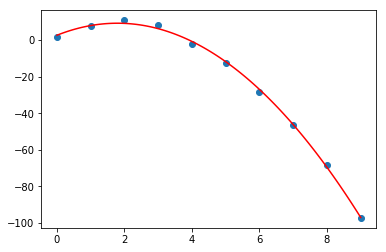

In [47]:
plt.scatter(x, y)
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(xp, betas[0] + betas[1]*xp + betas[2]*xp**2, c='red')
pass

**9**. (10  points)

2. Using `scipy.optimize`, find the values of $x$ and $y$ that minimize $e^{x^2 + y^2}$ in the unconstrained case and in the presence of the constraint that $x + y = 3$. Use (1,1) as a starting guess.

In [48]:
opt.minimize(lambda x: np.exp(x[0]**2 + x[1]**2), 
            np.ones(2))

      fun: 1.0000000000000002
 hess_inv: array([[ 0.74999784, -0.25000216],
       [-0.25000216,  0.74999784]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([-8.0369005e-09, -8.0369005e-09])

In [49]:
opt.minimize(lambda x: np.exp(x[0]**2 + x[1]**2), 
             np.ones(2), 
             constraints=dict(type='eq', fun=lambda x: x[0] + x[1] - 3))

     fun: 90.01713130056051
     jac: array([270.05131435, 270.05148602])
 message: 'Optimization terminated successfully.'
    nfev: 44
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.49999954, 1.50000046])

**10**. (10 points)

Implement a Python function to find roots using the bisection method. Use it to find solutions to $x^3 + 4x^2 -3 = x$ between -4 and 1. Do not use the standard library `bisect` method - the idea is to develop the algorithm using only basic Python language constructs.

In [50]:
def bisect(low, high, f, tol=1e-6):
    i = 0
    while high - low > tol:
        assert f(low) * f(high) < 0

        mid = (low + high)/2
        if f(mid) == 0:
            return mid

        if f(mid) * f(low) > 0:
            low = mid
        else:
            high = mid
    return mid

In [51]:
f = lambda x: x**3 + 4*x**2 - 3

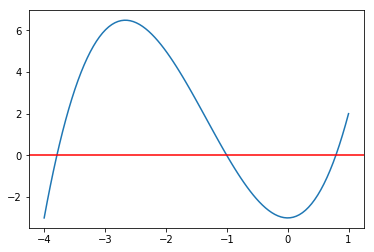

In [52]:
xp = np.linspace(-4, 1, 100)
plt.plot(xp, f(xp))
plt.axhline(0, c='red')
pass

In [53]:
bisect(0, 1, f), bisect(-2, 0, f), bisect(-4, -3, f)

(0.7912874221801758, -1.0, -3.791287422180176)

**11**. (10 points)

Let $f(x)$ be a linear transformation of $\mathbb{R}^3$ such that
$$\begin{eqnarray*}
f(e_1) &=& (1,1,3)\\
f(e_2) &=& (1,0,4)\\
f(e_3) &=& (0,2,1)
\end{eqnarray*}$$

* Find a matrix representation for $f$. 
* Compute the matrix representation for $f$ in the basis$$\begin{eqnarray*}
v_1 &=& (2,3,3)\\
v_2 &=& (8,5,2)\\
v_3 &=& (1,0,5)
\end{eqnarray*}$$

In [54]:
A = np.array([
    [1,1,3],
    [1,0,4],
    [0,2,1]
]).T

In [55]:
A

array([[1, 1, 0],
       [1, 0, 2],
       [3, 4, 1]])

In [56]:
P = np.array([
    [2,3,3],
    [8,5,2],
    [1,0,5]
]).T

In [57]:
P

array([[2, 8, 1],
       [3, 5, 0],
       [3, 2, 5]])

Recall that the for similar matrices $A$ and $B$,
$$
AP = PB
$$
so we want to solve $B = P^{-1}AP$.

In [58]:
la.solve(P, A @ P)

array([[ 3.59493671,  4.56962025,  5.48101266],
       [-0.55696203, -0.34177215, -1.08860759],
       [ 2.26582278,  6.59493671, -1.25316456]])

**12**. (10 points)

A milkmaid is at point A and needs to get to point B. However, she also needs to fill a pail of water from the river en route from A to B. The equation of the river's path is shown in the figure below. What is the minimum distance she has to travel to do this?

1. Solve using `scipy.optimize` and constrained minimization.
2. Solve without using `scipy.optimize`. Hint: Use Lagrange 

![Milkmaid problem](data/milkmaid.png)

In [97]:
def f(x, A, B):
    return la.norm(x-A) + la.norm(x-B)

x0 = np.array([4, 4])
A = np.array([2,8])
B = np.array([8,4])
cons = {'type': 'eq', 'fun': lambda x: x[1] - 10.0/(1 + x[0])}

res = opt.minimize(f, x0, args=(A, B), constraints=cons)
res.x

array([4.39870795, 1.85229503])

Using Lagrange multipliers, you can minimize the norm of $\nabla h$ using `scipy.optimize` without any constraints, where

$$
h(x, y, \lambda) = \sqrt{(x-2)^2 + (y-8)^2} + \sqrt{(x-8)^2 + (y-4)^2}
+ \lambda(y - \frac{10}{1+x})
$$

and $(x, y)$ is interpreted as a point on the river.

Internally, constrained optimization methods may translate a constrained problem into unconstrained optimization using this approach.

**13**. (10 points)

Given the set of vectors

```
v1 = np.array([1,2,3])
v2 = np.array([2,4,7])
v3 = np.array([1,0,1])
```

1. Calculate the pairwise Euclidean distance matrix 
2. Find an orthogonal basis for the space spanned by these vectors without using any functions from `numpy.linag` or `scipy.linalg` 

In [60]:
v1 = np.array([1,2,3])
v2 = np.array([2,4,7])
v3 = np.array([1,0,1])

def dist(u, v):
    w = u - v
    return np.sqrt(np.sum(w**2))

D = np.array([[dist(u1, u2) for u1 in [v1, v2, v3]] for u2 in [v1, v2, v3]])
D

array([[0.        , 4.58257569, 2.82842712],
       [4.58257569, 0.        , 7.28010989],
       [2.82842712, 7.28010989, 0.        ]])

In [61]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

**14**. (10 points)

Find the minimum of the following quadratic function on $\mathbb{R}^4$ 

$$f(x) = x^TAx +b^Tx +c$$
where
$$A = \left(\begin{matrix}13&5&0&0\\5&7&0&0\\0&0&20&-7\\0&0&-7&12\end{matrix}\right), b = \left(\begin{matrix}1\\1\\1\\1\end{matrix}\right) \textrm {and } c = 2$$

and $x$ is a column vector.

a. Using scipy.optimize (4 points)

b. Using a matrix decomposition method (library functions - no need to code your own).  Note: for full credit you should exploit matrix structure. (4 points)

c. Find the minimum under the constraint $||x||^2 = 1$ (i.e. on the unit sphere in $\mathbb{R}^4$). (2 points)

**Note: Do not be overly concerned if your values for $x$ at the minimum do not match exactly **



In [62]:
def func(x, A, b, c):
    return x.T.dot(A.dot(x)) + b.T.dot(x) + c

A = np.reshape([13,5,0,0,5,7,0,0,0,0,20,-7,0,0,-7,12], (4,4))
b = np.ones((4,1))
c = 2

x0 = np.zeros((4,1))
sol = opt.minimize(func, x0, args=(A, b, c))
sol

      fun: 1.9019117880374437
 hess_inv: array([[ 0.22125623, -0.40351264,  0.07392346,  0.07970686],
       [-0.40351264,  0.89317871, -0.16067036, -0.1732404 ],
       [ 0.07392346, -0.16067036,  0.06389778,  0.05335017],
       [ 0.07970686, -0.1732404 ,  0.05335017,  0.09012181]])
      jac: array([7.45058060e-08, 0.00000000e+00, 1.34110451e-07, 1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([-0.01515152, -0.06060607, -0.04973823, -0.07068063])

In [63]:
la.cho_solve(la.cho_factor(A), -b/2)

array([[-0.01515152],
       [-0.06060606],
       [-0.04973822],
       [-0.07068063]])

In [64]:
cons = {'type': 'eq', 'fun': lambda x: la.norm(x) - 1}
opt.minimize(func, x0, args=(A, b, c), constraints=cons)

     fun: 6.376291838681409
     jac: array([-4.49080557,  7.32257348, -0.67237055, -1.11864185])
 message: 'Optimization terminated successfully.'
    nfev: 231
     nit: 30
    njev: 30
  status: 0
 success: True
       x: array([-0.53067051,  0.83066275, -0.09135849, -0.14156921])

**15**. (10 points)

Given the following covariance matrix
```python
A = np.array([[2,1],[1,4]])
```

1. Show that the eigenvectors of $A$ are orthogonal.
2. What is the vector representing the first principal component direction?
3. Find $A^{-1}$ without performing a matrix inversion.
4. What are the coordinates of the data points (0, 1) and (1, 1) in the standard basis expressed as coordinates of the principal components?
5. What is the proportion of variance explained if we keep only the projection onto the first principal component?

In [65]:
A = np.array([[2,1],[1,4]])

In [66]:
E, V = la.eigh(A)

In [67]:
V[:,0] @ V[:,1]

0.0

In [68]:
E

array([1.58578644, 4.41421356])

In [69]:
V[:, 1]

array([0.38268343, 0.92387953])

In [70]:
Ainv = V @ np.diag(1/E) @ V.T

In [71]:
Ainv @ A

array([[1.00000000e+00, 0.00000000e+00],
       [5.55111512e-17, 1.00000000e+00]])

In [72]:
la.solve(V, np.array([0,1]).reshape(-1,1))

array([[0.38268343],
       [0.92387953]])

In [73]:
la.solve(V, np.array([1,1]).reshape(-1,1))

array([[-0.5411961 ],
       [ 1.30656296]])

In [74]:
max(E)/E.sum()

0.7357022603955158

**16**. (10 points)

Find the minimum of the following quadratic function on $\mathbb{R}^2$ 

$$f(x) = x^TAx +b^Tx +c$$
where
$$A = \left(\begin{matrix}13&5\\5&7\end{matrix}\right), b = \left(\begin{matrix}1\\1\end{matrix}\right) \textrm {and } c = 2$$

Under the constraints:
$$g(x) = 2x_1-5x_2=2 \;\;\;\;\;\; \textrm{ and } \;\;\;\;\;\; h(x) = x_1+x_2=1$$

1. Use a matrix decomposition method to find the minimum of the *unconstrained* problem without using `scipy.optimize` (Use library functions - no need to code your own). Note: for full credit you should exploit matrix structure. (3 points)
2. Find the solution using constrained optimization with the `scipy.optimize` package. (3 points)
2. Use Lagrange multipliers and solving the resulting set of equations directly without using `scipy.optimize`. (4 points)

In [75]:
A = np.array([[13,5],[5,7]])
b = np.array([1.0,1.0]).T
c = 2

la.cho_solve(la.cho_factor(A), -b/2)

array([-0.01515152, -0.06060606])

In [76]:
def f(x, A, b, c):
    return x.T.dot(A).dot(x) + b.T.dot(x) + c

# check unconstrained solution
usol = opt.minimize(f, [0,0], args=(A, b, c))
usol.x

array([-0.01515152, -0.06060606])

In [77]:
cons = ({'type': 'eq', 'fun': lambda x: 2*x[0] - 5*x[1] - 2},
        {'type': 'eq', 'fun': lambda x: x[0] + x[1] - 1})

opt.minimize(f, [0,0], constraints=cons, args=(A, b, c))

     fun: 15.999999999999996
     jac: array([26.99999976, 11.00000024])
 message: 'Optimization terminated successfully.'
    nfev: 14
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.00000000e+00, 3.41607086e-16])

In [78]:
M = np.array([
    [26, 10, 2, 1],
    [10, 14, -5, 1],
    [2, -5, 0, 0],
    [1, 1, 0, 0]
])

y = np.array([-1, -1, 2, 1]).T

la.solve(M, y)

array([ 1.00000000e+00, -4.37360585e-17, -2.28571429e+00, -2.24285714e+01])